## Hi Marta! 
#### This is a quick script to show you how to pull data from nxcals using Swan. 
#### Before running the code make sure to select the 'star' symbol in the tab and select include 'nxcals' and 'sparcmetrics' options.

In [1]:
# some packages for visualisation
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import package to access Timber
import pytimber

# initialise the logging
ldb = pytimber.LoggingDB(spark_session = spark)

In [3]:
# you can pull data from a fill you are interested in
fill = 9843

# get the timestamps of different beam modes during chosen fill
fill_timestamps = ldb.get_lhc_fill_data(fill)
ffn = {item['mode']:item for item in fill_timestamps['beamModes']}

# define times of the mode you are interested in exploring
t1 = ffn['FLATTOP']['startTime']
t2 = ffn['FLATTOP']['endTime']

/cvmfs/sft.cern.ch/lcg/views/LCG_105a_nxcals_pro/x86_64-el9-gcc13-opt/lib/python3.9/site-packages/pytimber/utils.py:93: UserWarning: Discarding nonzero nanoseconds in conversion.
  return pd.to_datetime(nanos, unit="ns", utc=utc).to_pydatetime()


In [4]:
# load the variable you are interested in
BPM_varname_H = 'BFC.LHC:OrbitAcq:positionsH'
BPM_varname_V = 'BFC.LHC:OrbitAcq:positionsV'

BPM_pos_H = ldb.get(BPM_varname_H, t1, t2)
BPM_pos_V = ldb.get(BPM_varname_V, t1, t2)

In [5]:
# the first array is time, and the second is an array of arrays containing readings from different BPMs
t = BPM_pos_H['BFC.LHC:OrbitAcq:positionsH'][0]
BPM_readings_H = BPM_pos_H['BFC.LHC:OrbitAcq:positionsH'][1]

In [6]:
# let's turn the arrays into DataFrame so we can easily access it
df = pd.DataFrame(bpm for bpm in BPM_readings_H)

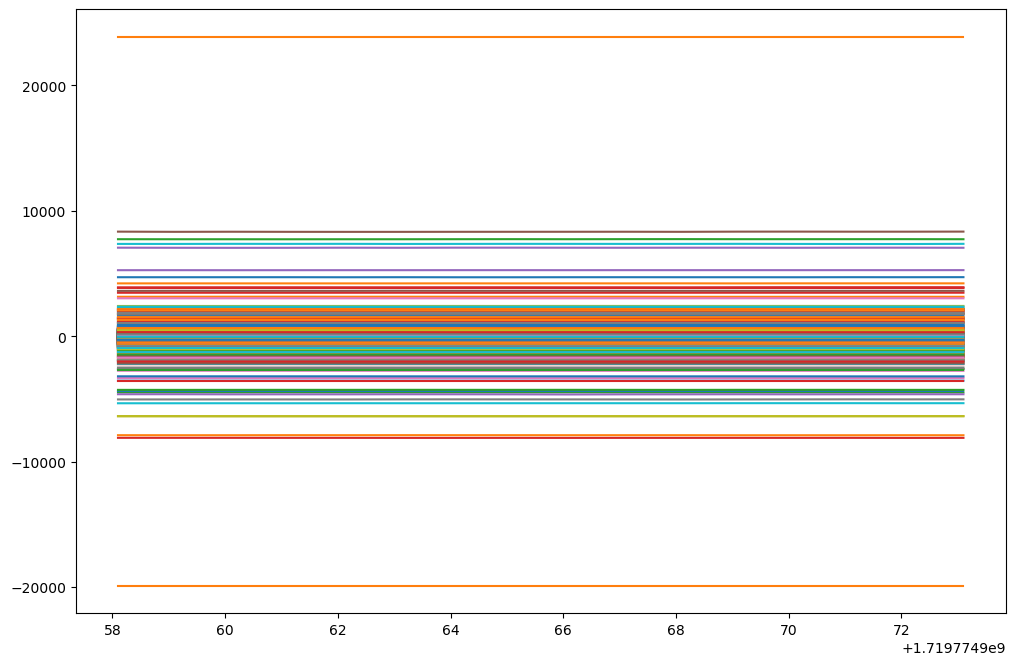

In [7]:
# now I am plotting all BPM readings in the same plot, but you can later on extract just the one you are interested in
plt.figure(figsize = (12,8), dpi = 100)

for i in range(len(df.columns)):
    plt.plot(t, df[i])
    
plt.show()